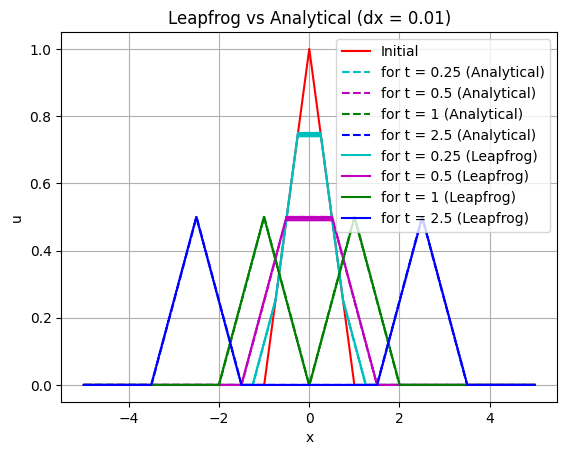

In [ ]:
import numpy
from matplotlib import pyplot
import math

t1 = 0
t2 = 0.25
t3 = 0.5
t4 = 1
t5 = 2.5
dx = 0.01

#initial profiles

def init(x):
    if x>=4 and x<=5:
        return x-4
    elif x>5 and x<=6:
        return 6-x
    else:
        return 0
 
u_init=[]
for i in range(int(10/dx)+1):
    u_init.append(init(i*dx))

u_ana1=[]
u_ana2=[]
u_ana3=[]
u_ana4=[]
for i in range(int(10/dx)+1):
    u_ana1.append(0.5*(init(i*dx + t2) + init(i*dx - t2)))
    u_ana2.append(0.5*(init(i*dx + t3) + init(i*dx - t3)))
    u_ana3.append(0.5*(init(i*dx + t4) + init(i*dx - t4)))
    u_ana4.append(0.5*(init(i*dx + t5) + init(i*dx - t5)))

def Leapfrog( dx, u_init, t ):
    dt = dx
    u0 = u_init.copy()
    u1 = u_init.copy()
    for i in range(1,int(10/dx)):
        u1.append(u0[i] + 0.5*(u0[i-1] - 2*u0[i] + u0[i+1]))
    itr=0
    u2 = u_init.copy()
    for n in range(int(t/dt)):
        for i in range(1,int(10/dx)):
            u2[i] = 2*u1[i] - u0[i] + ((dt**2)/(dx**2))*(u1[i-1]-2*u1[i]+u1[i+1])
        #periodic bcs
        
        u0 = u1.copy()
        u0[0] = u1[int(10/dx)]
        u0[1] = u1[int(10/dx)-1]
        u0[2] = u1[int(10/dx)-2]
        
        u1 = u2.copy()
        u1[0] = u2[int(10/dx)]
        u1[1] = u2[int(10/dx)-1]
        u1[2] = u2[int(10/dx)-2]
        
        itr = itr+1
   # print(itr)
    return u2 

pyplot.plot(numpy.linspace(-5,5,int(10/dx)+1),Leapfrog( dx, u_init, t1 ),'r-', label = 'Initial' )
pyplot.plot(numpy.linspace(-5,5,int(10/dx)+1),u_ana1,'c--', label = 'for t = 0.25 (Analytical)' )
pyplot.plot(numpy.linspace(-5,5,int(10/dx)+1),u_ana2,'m--', label = 'for t = 0.5 (Analytical)' )
pyplot.plot(numpy.linspace(-5,5,int(10/dx)+1),u_ana3,'g--', label = 'for t = 1 (Analytical)' )
pyplot.plot(numpy.linspace(-5,5,int(10/dx)+1),u_ana4,'b--', label = 'for t = 2.5 (Analytical)' )
pyplot.plot(numpy.linspace(-5,5,int(10/dx)+1),Leapfrog( dx, u_init, t2 ),'c-', label = 'for t = 0.25 (Leapfrog)' )
pyplot.plot(numpy.linspace(-5,5,int(10/dx)+1),Leapfrog( dx, u_init, t3 ),'m-', label = 'for t = 0.5 (Leapfrog)' )
pyplot.plot(numpy.linspace(-5,5,int(10/dx)+1),Leapfrog( dx, u_init, t4 ),'g-', label = 'for t = 1 (Leapfrog)' )
pyplot.plot(numpy.linspace(-5,5,int(10/dx)+1),Leapfrog( dx, u_init, t5 ),'b-', label = 'for t = 2.5 (Leapfrog)' )
pyplot.ylabel('u')
pyplot.xlabel('x')
pyplot.legend(loc='best')
pyplot.grid()
pyplot.title("Leapfrog vs Analytical (dx = 0.01)")
pyplot.show()

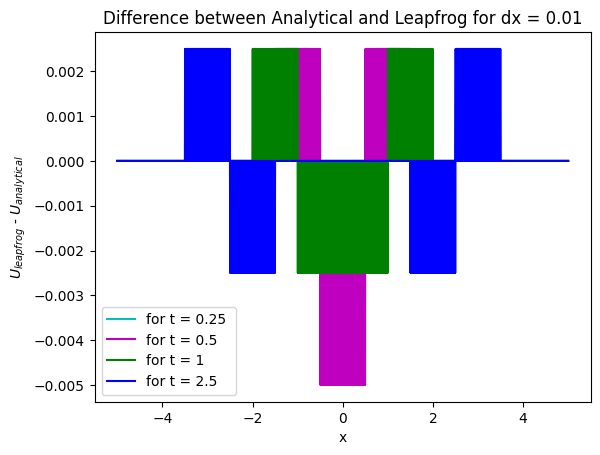

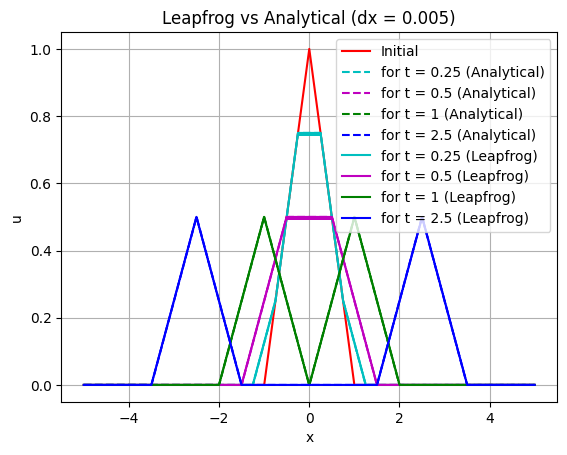

In [ ]:
temp1 = Leapfrog( dx, u_init, t2 )
temp2 = Leapfrog( dx, u_init, t3 )
temp3 = Leapfrog( dx, u_init, t4 )
temp4 = Leapfrog( dx, u_init, t5 )
e1 = list() 
e2 = list()
e3 = list()
e4 = list()
for i in range(int(10/dx)+1):
    e1.append((temp1[i] - u_ana1[i]))
    e2.append((temp2[i] - u_ana2[i]))
    e3.append((temp3[i] - u_ana3[i]))
    e4.append((temp4[i] - u_ana4[i]))
    
pyplot.plot(numpy.linspace(-5,5,int(10/dx)+1),e1,'c-', label = 'for t = 0.25 ' )
pyplot.plot(numpy.linspace(-5,5,int(10/dx)+1),e2,'m-', label = 'for t = 0.5 ' )
pyplot.plot(numpy.linspace(-5,5,int(10/dx)+1),e3,'g-', label = 'for t = 1 ' )
pyplot.plot(numpy.linspace(-5,5,int(10/dx)+1),e4,'b-', label = 'for t = 2.5 ' )
pyplot.ylabel('$U_{leapfrog}$ - $U_{analytical}$')
pyplot.xlabel('x')
pyplot.legend(loc='best')
pyplot.title("Difference between Analytical and Leapfrog for dx = 0.01")
pyplot.show()

dx = 0.005
u_init=[]
for i in range(int(10/dx)+1):
    u_init.append(init(i*dx))

u_ana1=[]
u_ana2=[]
u_ana3=[]
u_ana4=[]
for i in range(int(10/dx)+1):
    u_ana1.append(0.5*(init(i*dx + t2) + init(i*dx - t2)))
    u_ana2.append(0.5*(init(i*dx + t3) + init(i*dx - t3)))
    u_ana3.append(0.5*(init(i*dx + t4) + init(i*dx - t4)))
    u_ana4.append(0.5*(init(i*dx + t5) + init(i*dx - t5)))
pyplot.plot(numpy.linspace(-5,5,int(10/dx)+1),Leapfrog( dx, u_init, t1 ),'r-', label = 'Initial' )
pyplot.plot(numpy.linspace(-5,5,int(10/dx)+1),u_ana1,'c--', label = 'for t = 0.25 (Analytical)' )
pyplot.plot(numpy.linspace(-5,5,int(10/dx)+1),u_ana2,'m--', label = 'for t = 0.5 (Analytical)' )
pyplot.plot(numpy.linspace(-5,5,int(10/dx)+1),u_ana3,'g--', label = 'for t = 1 (Analytical)' )
pyplot.plot(numpy.linspace(-5,5,int(10/dx)+1),u_ana4,'b--', label = 'for t = 2.5 (Analytical)' )
pyplot.plot(numpy.linspace(-5,5,int(10/dx)+1),Leapfrog( dx, u_init, t2 ),'c-', label = 'for t = 0.25 (Leapfrog)' )
pyplot.plot(numpy.linspace(-5,5,int(10/dx)+1),Leapfrog( dx, u_init, t3 ),'m-', label = 'for t = 0.5 (Leapfrog)' )
pyplot.plot(numpy.linspace(-5,5,int(10/dx)+1),Leapfrog( dx, u_init, t4 ),'g-', label = 'for t = 1 (Leapfrog)' )
pyplot.plot(numpy.linspace(-5,5,int(10/dx)+1),Leapfrog( dx, u_init, t5 ),'b-', label = 'for t = 2.5 (Leapfrog)' )
pyplot.ylabel('u')
pyplot.xlabel('x')
pyplot.legend(loc='best')
pyplot.grid()
pyplot.title("Leapfrog vs Analytical (dx = 0.005)")
pyplot.show()


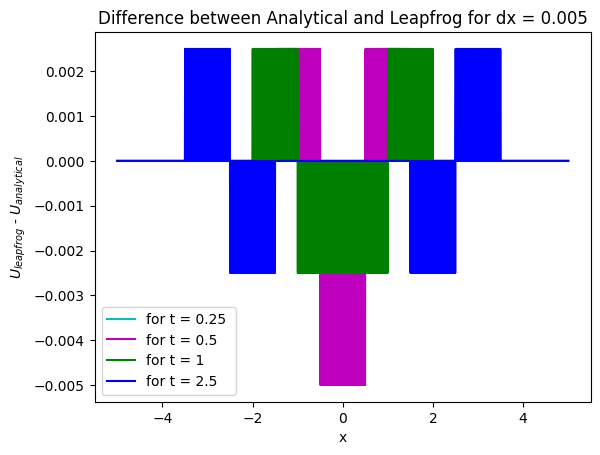

In [ ]:
temp1 = Leapfrog( dx, u_init, t2 )
temp2 = Leapfrog( dx, u_init, t3 )
temp3 = Leapfrog( dx, u_init, t4 )
temp4 = Leapfrog( dx, u_init, t5 )
e1 = list() 
e2 = list()
e3 = list()
e4 = list()
for i in range(int(10/dx)+1):
    e1.append((temp1[i] - u_ana1[i]))
    e2.append((temp2[i] - u_ana2[i]))
    e3.append((temp3[i] - u_ana3[i]))
    e4.append((temp4[i] - u_ana4[i]))
    
pyplot.plot(numpy.linspace(-5,5,int(10/dx)+1),e1,'c-', label = 'for t = 0.25 ' )
pyplot.plot(numpy.linspace(-5,5,int(10/dx)+1),e2,'m-', label = 'for t = 0.5 ' )
pyplot.plot(numpy.linspace(-5,5,int(10/dx)+1),e3,'g-', label = 'for t = 1 ' )
pyplot.plot(numpy.linspace(-5,5,int(10/dx)+1),e4,'b-', label = 'for t = 2.5 ' )
pyplot.ylabel('$U_{leapfrog}$ - $U_{analytical}$')
pyplot.xlabel('x')
pyplot.legend(loc='best')
pyplot.title("Difference between Analytical and Leapfrog for dx = 0.005")
pyplot.show()